In [4]:
# https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection
import glob, os

trainImgPathL = sorted( glob.glob("./archive/train_zip/train/*.jpg") )
trainAntPathL = sorted( glob.glob("./archive/train_zip/train/*.xml") )
validImgPathL = sorted( glob.glob("./archive/test_zip/test/*.jpg") )
validAntPathL = sorted( glob.glob("./archive/test_zip/test/*.xml") )

print( len(trainImgPathL), len(trainAntPathL), len(validImgPathL), len(validAntPathL) ) # 240, 240, 60, 60

for imgPath,antPath in zip(trainImgPathL+validImgPathL, trainAntPathL+validAntPathL):
    assert os.path.abspath(imgPath)[:-4] == os.path.abspath(antPath)[:-4], (imgPath,antPath)

240 240 60 60


In [2]:
import random
import visualization as vis

R = list(range(len(trainImgPathL)))
random.shuffle(R)
for i in range(10):
    break
    vis.show( trainImgPathL[R[i]], trainAntPathL[R[i]], classList=['apple','banana','orange'] )

NameError: name 'trainImgPathL' is not defined

In [6]:
import re

classD = {}
for trainAntPath in trainAntPathL:
    txt = open(trainAntPath, "r").read()
    catL = re.findall("<name>(.*)</name>", txt)
    for cat in catL:
        classD[cat] = classD[cat]+1 if cat in classD else 1
print( classD )

{'apple': 156, 'banana': 169, 'orange': 140}


In [7]:
import cv2

shapeD = {}
for trainImgPath in trainImgPathL:
    h, w, c = cv2.imread(trainImgPath).shape
    shapeD[(h,w)] = shapeD[(w,h)]+1 if (w,h) in shapeD else 1 
print( shapeD )

{(349, 349): 1, (1500, 1500): 1, (436, 652): 1, (428, 450): 1, (800, 800): 2, (640, 960): 1, (1046, 1400): 1, (300, 333): 1, (800, 700): 1, (458, 610): 1, (1200, 1600): 1, (250, 250): 5, (500, 500): 9, (426, 640): 1, (693, 693): 1, (1696, 1132): 1, (241, 350): 1, (350, 700): 1, (300, 300): 2, (708, 1000): 1, (439, 780): 1, (947, 1320): 1, (797, 800): 1, (450, 298): 1, (171, 166): 1, (352, 389): 1, (1390, 1300): 1, (768, 1366): 1, (240, 351): 1, (387, 620): 1, (287, 338): 1, (720, 720): 1, (335, 337): 1, (452, 602): 1, (600, 800): 1, (641, 960): 1, (300, 271): 1, (350, 620): 1, (227, 300): 1, (295, 260): 1, (450, 468): 1, (261, 300): 1, (936, 1023): 1, (232, 350): 1, (900, 1200): 1, (533, 800): 1, (810, 720): 1, (1135, 1600): 1, (587, 950): 1, (645, 645): 1, (340, 490): 1, (720, 1280): 1, (640, 640): 1, (476, 634): 1, (1010, 1010): 1, (1332, 1300): 1, (250, 196): 1, (368, 654): 1, (220, 220): 1, (290, 290): 1, (353, 450): 1, (168, 238): 1, (525, 700): 1, (406, 722): 1, (480, 720): 1, (6

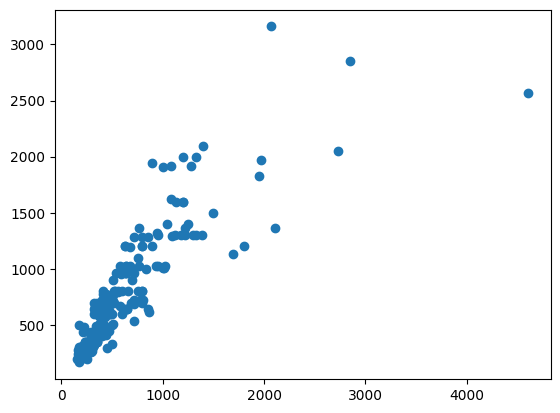

In [8]:
import matplotlib.pyplot as plt

H = [ h for h,_ in shapeD.keys() ]
W = [ w for _,w in shapeD.keys() ]
plt.scatter( H,W )
plt.show()

In [9]:
# 224, 112, 56, 28

In [11]:
numD = {}
for trainAntPath in trainAntPathL:
    txt = open(trainAntPath, "r").read()
    n   = len( re.findall("<object>",txt) )
    numD[n] = numD[n]+1 if n in numD else 1
print( numD )

{1: 140, 3: 36, 2: 35, 5: 5, 7: 3, 6: 2, 8: 2, 4: 16, 9: 1}
